# Project with Linear Regression
# We need to predict the chance of admission based on various scores such as
# * GRE Score
# * TOEFL Score
# * University Rating
# * SOP
# * LOR
# * CGPA
# * Research

# target/label : Chance of Admit

In [1]:
# Lets start with importing neccessary libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [4]:
#read csv files & convert them into dataframe.

In [27]:
data = pd.read_csv("C:\\Users\\EZB\\Desktop\\Machine learning\\Admission_Prediction.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [32]:
data.shape

(500, 9)

In [33]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [34]:
data.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,500,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [35]:
data.isna().sum() # checking null values

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [ ]:
#Filling The Null Values 

In [46]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [48]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [49]:
data.isna().sum() #verify if NAN is filled or not

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [63]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.558763,107.187755,3.118000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.103952,6.051338,1.128993,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,309.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,316.558763,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,324.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [64]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


# Lets visualize the data and analyze the relationship between independent and dependent variable

In [66]:
# lets see how data is distributed for every column , is it skew or not

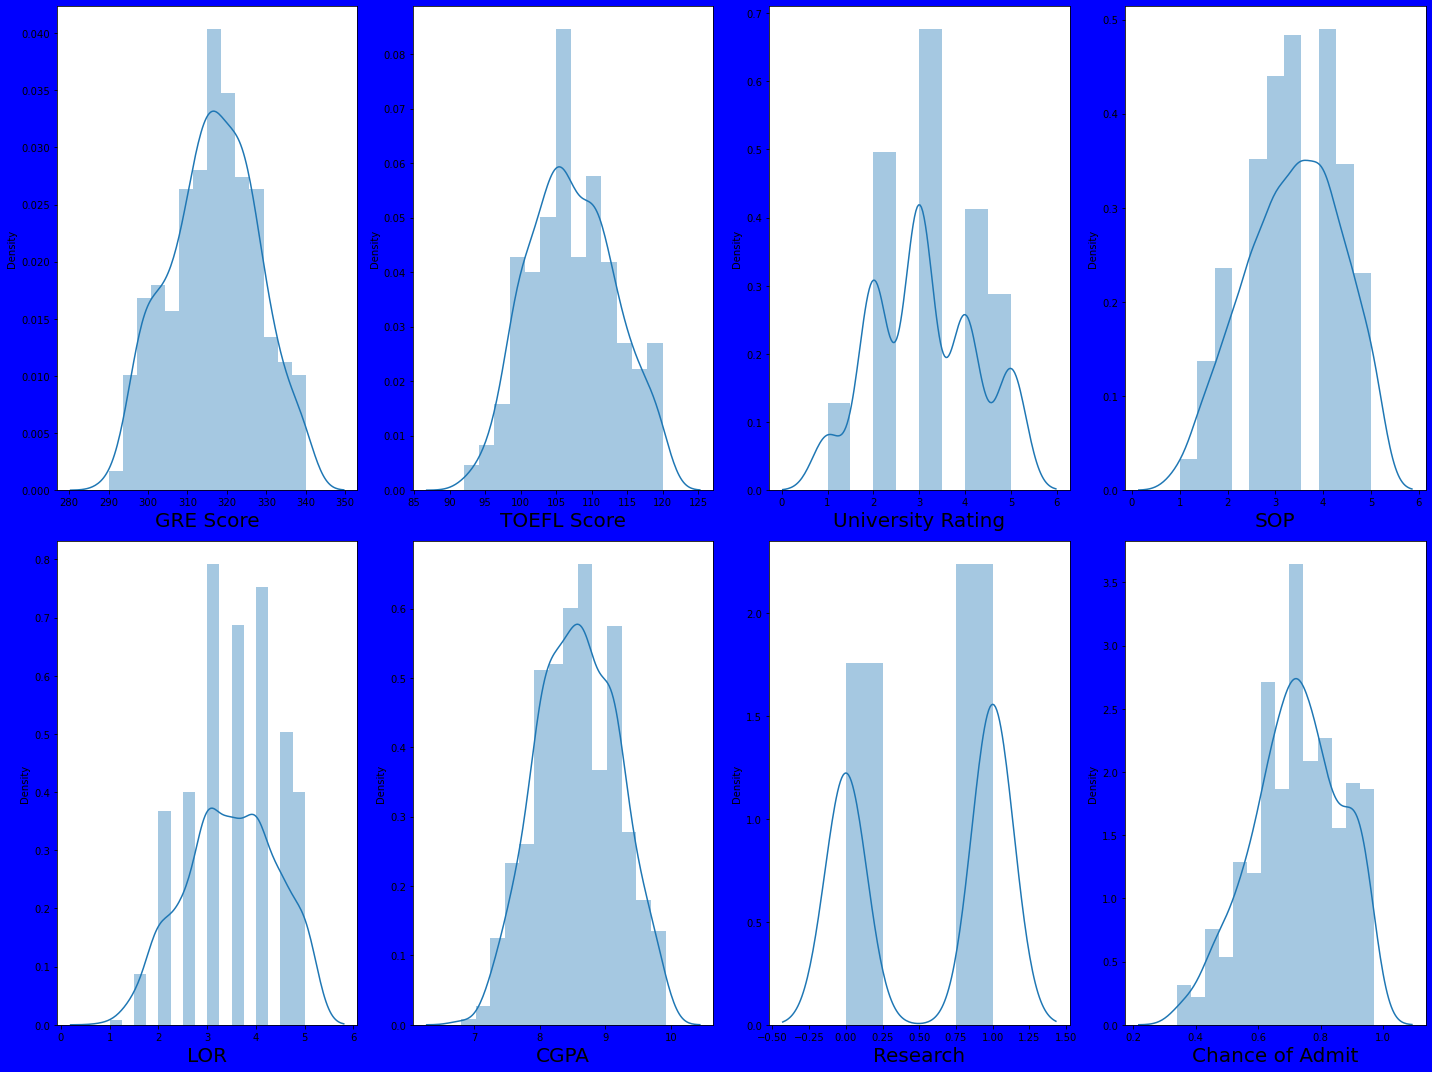

In [73]:
plt.figure(figsize=(20,15), facecolor='blue')
plotnumber=1

for column in data:
    if plotnumber <= 8:
        ax = plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    
    plotnumber +=1
    plt.tight_layout()

# The data diistribution looks descent enough and there diesnt seems any skewness. Great lets go ahead

# Lets observe the relationship between independent variables & dependent varribales

In [74]:
# divide dataset into feature and label

In [77]:
y = data ['Chance of Admit']
x = data.drop (columns=['Chance of Admit'])
y
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337.000000,118.0,4.0,4.5,4.5,9.65,1
1,324.000000,107.0,4.0,4.0,4.5,8.87,1
2,316.558763,104.0,3.0,3.0,3.5,8.00,1
3,322.000000,110.0,3.0,3.5,2.5,8.67,1
4,314.000000,103.0,2.0,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332.000000,108.0,5.0,4.5,4.0,9.02,1
496,337.000000,117.0,5.0,5.0,5.0,9.87,1
497,330.000000,120.0,5.0,4.5,5.0,9.56,1
498,312.000000,103.0,4.0,4.0,5.0,8.43,0


# visualizing Relationship

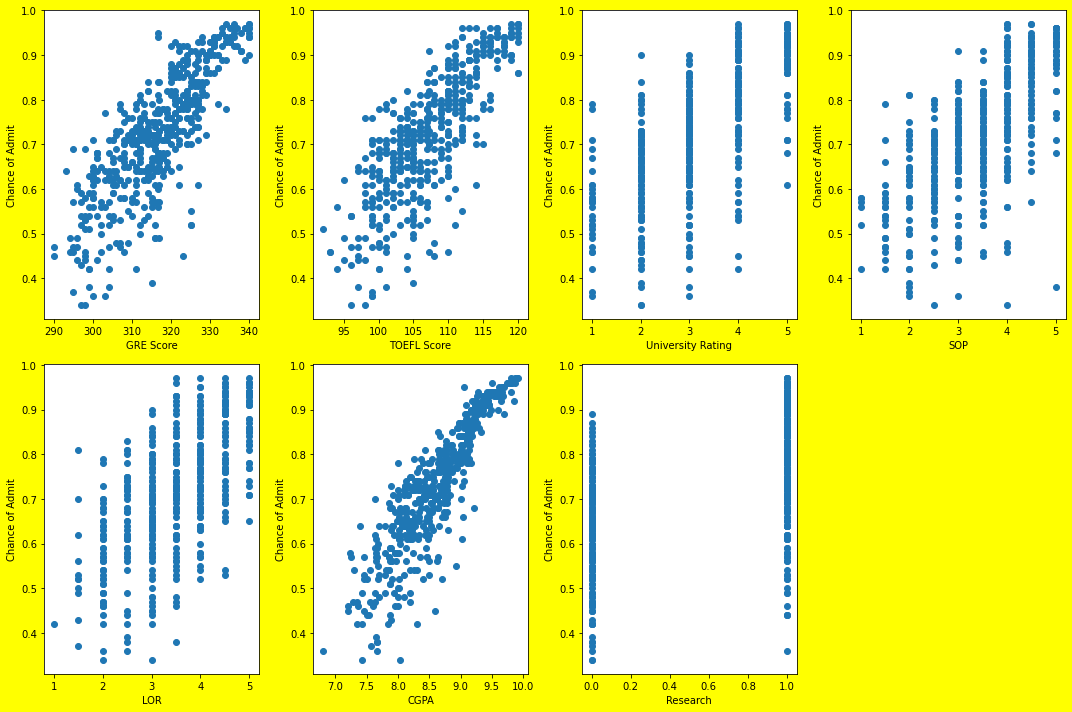

In [82]:
plt.figure(figsize = (15,10),facecolor='yellow')
plotnumber = 1

for column in x:
    if plotnumber <=8 :
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 10)
        plt.ylabel('Chance of Admit', fontsize= 10)
    
    plotnumber +=1
    plt.tight_layout()

# Great the relationship between the feature and label are look fairly linear. Thus our linear Assumption is satisfied

In [84]:
# data scaling

In [85]:
scaler = StandardScaler()            # apply standard scaler only on features
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.84274116e+00,  1.78854223e+00,  7.82009548e-01, ...,
         1.09894429e+00,  1.77680627e+00,  8.86405260e-01],
       [ 6.70814288e-01, -3.10581135e-02,  7.82009548e-01, ...,
         1.09894429e+00,  4.85859428e-01,  8.86405260e-01],
       [ 5.12433309e-15, -5.27312752e-01, -1.04622593e-01, ...,
         1.73062093e-02, -9.54042814e-01,  8.86405260e-01],
       ...,
       [ 1.21170361e+00,  2.11937866e+00,  1.66864169e+00, ...,
         1.63976333e+00,  1.62785086e+00,  8.86405260e-01],
       [-4.10964364e-01, -6.92730965e-01,  7.82009548e-01, ...,
         1.63976333e+00, -2.42366993e-01, -1.12815215e+00],
       [ 9.41258951e-01,  9.61451165e-01,  7.82009548e-01, ...,
         1.09894429e+00,  7.67219636e-01, -1.12815215e+00]])

# lets go ahead and use linear Regression and see how good it fits our data,
# But first lets split our data in Train AND Test

In [87]:
x_train,x_test,y_train,y_test = train_test_split (x_scaled,y,test_size=0.25, random_state = 49) #x_scaled = is feature , y=label
y_train.head()

401    0.66
221    0.75
110    0.61
76     0.74
195    0.78
Name: Chance of Admit, dtype: float64

# model instantiating and training

In [88]:
regression = LinearRegression()
regression.fit(x_train, y_train)
# .fit method is for training the model

LinearRegression()

# Now predict the chance of admit 

In [89]:
data.tail(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
498,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73
499,327.0,113.0,4.0,4.5,4.5,9.04,0,0.84


In [90]:
# since we have already fit the scaler , you can transform the data

In [91]:
print('chance of admission is : ', regression.predict(scaler.transform ([[312.0,103.0,4.0,4.0,5.0,8.43,0]])))

chance of admission is :  [0.70551753]


In [92]:
# saving the model

In [93]:
filename = 'final_model.pickle'
pickle.dump(regression, open(filename, 'wb'))